<a href="https://colab.research.google.com/github/datajcthemax/playdata/blob/main/day18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 18번째 이야기
- 회귀와 분류
- 선형 회귀와 로지스틱 회귀
- Git실습 팀 프로젝트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# 데이터 로딩
PATH = '/content/drive/MyDrive/datas/따릉이/train.csv'
data = pd.read_csv(PATH)

In [4]:
#중복제거
data = data.drop_duplicates()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 136.8 KB


In [6]:
data.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [11]:
#스케일링
from sklearn.preprocessing import MinMaxScaler

mscaler = MinMaxScaler()

In [12]:
mscaler

MinMaxScaler()

In [13]:
# 변환데이터 = mscaler.fit_transform(데이터)

In [14]:
data.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [15]:
data.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

In [16]:
X = data[['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']]
y = data['count']

In [17]:
y = data.pop('count')
X = data

In [18]:
X.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'],
      dtype='object')

In [19]:
y

0        49.0
1       159.0
2        26.0
3        57.0
4       431.0
        ...  
1454     21.0
1455     20.0
1456     22.0
1457    216.0
1458    170.0
Name: count, Length: 1328, dtype: float64

In [21]:
X = mscaler.fit_transform(X)
X

array([[0.        , 0.86956522, 0.49070632, ..., 0.19672131, 0.25769231,
        0.30487805],
       [0.00137868, 0.56521739, 0.63197026, ..., 0.31967213, 0.24615385,
        0.3902439 ],
       [0.00183824, 0.26086957, 0.40148699, ..., 0.24590164, 0.08846154,
        0.13414634],
       ...,
       [0.99862132, 0.2173913 , 0.56505576, ..., 0.04918033, 0.08076923,
        0.15853659],
       [0.99954044, 0.91304348, 0.65427509, ..., 0.64754098, 0.23846154,
        0.34146341],
       [1.        , 0.73913043, 0.66914498, ..., 0.35245902, 0.11153846,
        0.1097561 ]])

In [22]:
check = pd.DataFrame(X, columns=['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'])
check

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0.000000,0.869565,0.490706,1.0,0.1875,0.891304,0.259105,0.196721,0.257692,0.304878
1,0.001379,0.565217,0.631970,0.0,0.1750,0.445652,0.436004,0.319672,0.246154,0.390244
2,0.001838,0.260870,0.401487,0.0,0.0875,0.782609,0.678460,0.245902,0.088462,0.134146
3,0.002298,1.000000,0.185874,0.0,0.3375,0.510870,0.451613,0.303279,0.253846,0.682927
4,0.002757,0.782609,0.981413,0.0,0.6000,0.000000,1.000000,0.442623,0.069231,0.036585
...,...,...,...,...,...,...,...,...,...,...
1323,0.997702,0.173913,0.509294,0.0,0.2000,0.500000,1.000000,0.229508,0.107692,0.231707
1324,0.998162,0.130435,0.286245,0.0,0.4750,0.413043,1.000000,0.295082,0.096154,0.134146
1325,0.998621,0.217391,0.565056,0.0,0.2375,0.510870,1.000000,0.049180,0.080769,0.158537
1326,0.999540,0.913043,0.654275,0.0,0.4625,0.326087,0.685224,0.647541,0.238462,0.341463


# train, test data 분할

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()

In [50]:
model.fit(X_train, y_train)

LinearRegression()

In [51]:
pred = model.predict(X_test)

# 평가지표 사용

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(y_test, pred) # 0.5515564992691437 # 0.5317193468416678 # 0.47264572230162094 # 0.6475067001646859 # 0.6475067001646859

0.6475067001646859

In [54]:
import matplotlib.pyplot as plt

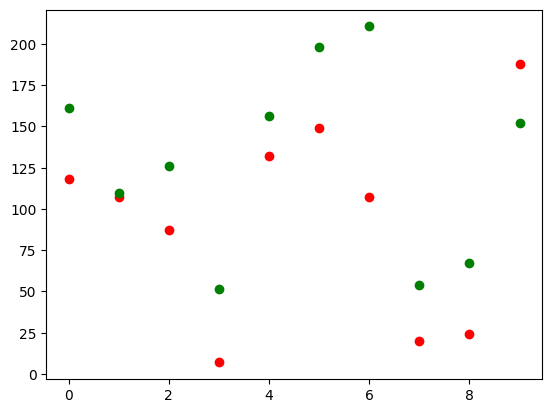

In [55]:
plt.plot(y_test.to_numpy()[:10],'ro')
plt.plot(pred[:10],'go')